In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:

single_image= X_train[0]

In [8]:
single_image.shape

(28, 28)

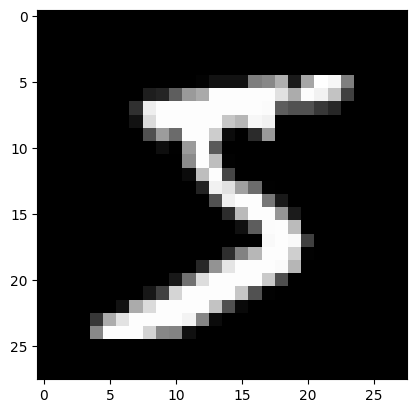

In [9]:
plt.imshow(single_image,cmap='gray')

In [10]:
y_train.shape

(60000,)

In [11]:
X_train.min()

0

In [12]:
X_train.max()

255

In [13]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [14]:
X_train_scaled.min()

0.0

In [15]:
X_train_scaled.max()

1.0

In [16]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [18]:
type(y_train_onehot)

numpy.ndarray

In [19]:
y_train_onehot.shape

(60000, 10)

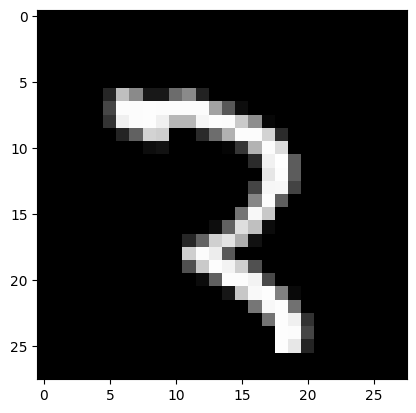

In [20]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [21]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [40]:
ai_model = keras.Sequential()
ai_model.add(layers.Input(shape=(28,28,1)))
ai_model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
ai_model.add(layers.MaxPool2D(pool_size=(2,2)))
ai_model.add(layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
ai_model.add(layers.Flatten())
ai_model.add(layers.Dense(24,activation='relu'))
ai_model.add(layers.Dense(28,activation='relu'))
ai_model.add(layers.Dense(10,activation='softmax'))


In [41]:
ai_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 24)                98328     
                                                                 
 dense_6 (Dense)             (None, 28)                700       
                                                      

In [42]:
# Choose the appropriate parameters
ai_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [43]:
ai_model.fit(X_train_scaled ,y_train_onehot, epochs=10,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 0.1897 - accuracy: 0.9410 - val_loss: 0.0582 - val_accuracy: 0.9812
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.0372 - val_accuracy: 0.9892
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0357 - val_accuracy: 0.9879
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0418 - val_accuracy: 0.9882
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.0321 - val_accuracy: 0.9901
Epoch 

In [44]:
metrics = pd.DataFrame(ai_model.history.history)

In [45]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.189663,0.940967,0.058231,0.9812
1,0.054284,0.983700,0.037191,0.9892
2,0.037826,0.988033,0.035696,0.9879
3,0.027745,0.991333,0.032976,0.9900
4,0.022988,0.992467,0.032415,0.9901


<Axes: >

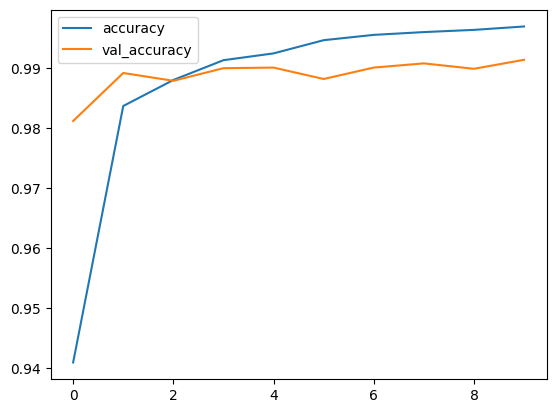

In [46]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

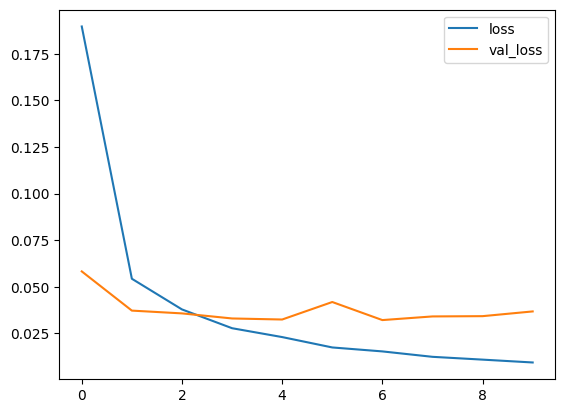

In [47]:
metrics[['loss','val_loss']].plot()

In [48]:
x_test_predictions = np.argmax(ai_model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 3ms/step


In [49]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 975    1    0    0    0    0    0    3    1    0]
 [   0 1132    0    1    0    0    0    1    1    0]
 [   1    1 1020    1    2    0    1    5    1    0]
 [   0    0    1 1005    0    2    0    2    0    0]
 [   0    0    0    0  977    0    2    1    0    2]
 [   1    0    0    5    0  883    1    2    0    0]
 [   4    3    0    0    1    3  947    0    0    0]
 [   0    3    1    0    0    0    0 1022    1    1]
 [   2    0    2    3    0    3    2    1  960    1]
 [   0    0    0    2    4    3    0    5    2  993]]


In [50]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [85]:
img = image.load_img('img1.png')

In [86]:
type(img)

PIL.Image.Image

In [87]:
img = image.load_img('img1.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [88]:
x_single_prediction = np.argmax(
    ai_model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [89]:
print(x_single_prediction)

[3]


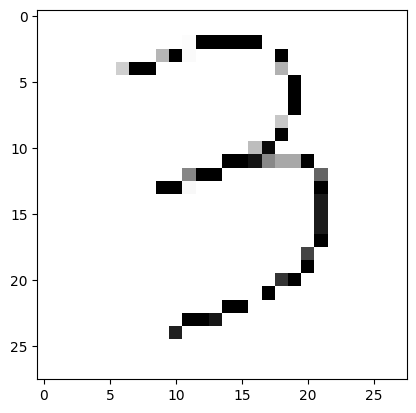

In [90]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [91]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [92]:
x_single_prediction = np.argmax(
    ai_model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [93]:
print(x_single_prediction)

[3]
